In [1]:
import tensorflow as tf
import numpy as np
from predictor import Predictor
import matplotlib.pyplot as plt
import pandas as pd
import math
from  models import esum2, esum
import random

In [2]:
input_width = 2**12
label_width = 4
shift = 4
sections = int(math.log2(input_width))
model = "models/spectral1.h5"
# model = dense_model((input_width, sample_width), units=2 ** 12, sections=sections)
predictor = Predictor("datas/EURUSD_H1 copy.csv", model,
    input_width=input_width,
    label_width=label_width,
    shift=shift,
    train_ratio=0.8,
    val_ratio=0.1,
    test_ratio=0.1,
    batch_size=256,
)

Размер train: 43447
Размер validation: 5430
Размер test: 5432
Размер окна: 4100
Размер входа: 4096
Размер выхода: 4
Индексы входа: [   0    1    2 ... 4093 4094 4095]
Индексы выхода: [4096 4097 4098 4099]


(123, 4096) (123, 4)


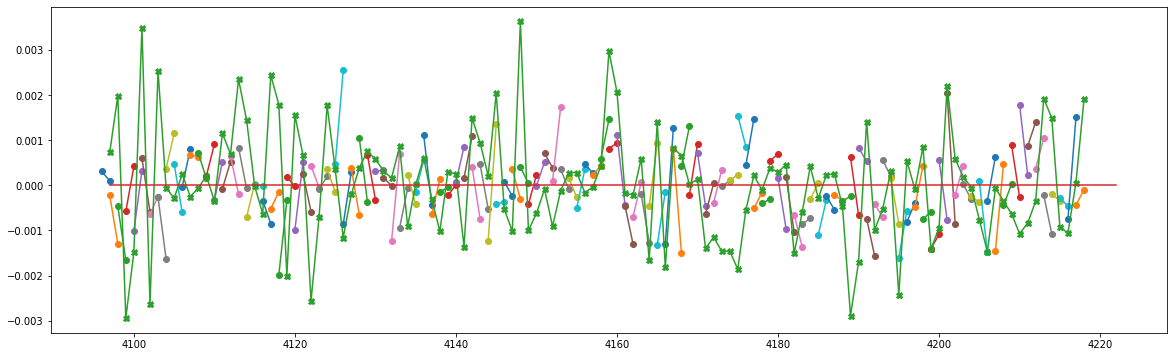

In [21]:
df = pd.read_csv(
    "datas/EURUSD_H1 copy.csv", sep="\t", header=0, dtype={"open": float,"close": float,"tickvol": float,"vol": float},
    parse_dates=[[0,1]],
    index_col=[0],
    names=["date","time","open","high","low","close","tickvol","vol","spread"])
t_count = input_width+2**7
t_shift = random.randint(0,2**10)
prices = df['open'][-t_count-t_shift:-1-t_shift]
shift = predictor.dataloader.input_width
ds = predictor.dataloader.make_dataset(prices)
for i,l in ds:
    print(i.shape, l.shape)
labels = l.numpy()
n = len(labels)
inputs = []
result1 = []
t = np.arange(len(prices)+predictor.dataloader.total_window_size)
plt.subplots(nrows=1, ncols=1, figsize=(20,6))
for i in range(len(prices)-predictor.dataloader.total_window_size-1):
    idx = i+predictor.dataloader.input_width
    idx_shift1 = i+predictor.dataloader.input_width+1
    inputs.append((prices[idx_shift1]-prices[idx]))
    r = predictor.predict(prices[i:idx_shift1]).flatten()[:2]
    plt.plot(t[i+predictor.dataloader.input_width:i+predictor.dataloader.input_width+2], r, marker='o')    
    result1.append(r)
# outputs = predictor.iterate(prices[:-16], steps=16)
t_start = predictor.dataloader.input_width+1
t_end = len(prices)
plt.plot(t[t_start:t_end-4], inputs[:t_end-t_start-2], marker='X')
# plt.plot(t[1:len(inputs)],inputs[:len(inputs)-1], marker='o')
# plt.plot(t[:len(inputs)],result1, marker='X')
plt.plot(t[t_start:t_end],np.zeros(t_end-t_start))